<a href="https://colab.research.google.com/github/sahupra1357/tensorflow/blob/main/Tensoflow_TransferLearningCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
import numpy as np

In [2]:
num_classes=1280
IMG_SIZE = 224

In [3]:
def build_model():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_tensor=inputs)
    #base_model.trainable = False
    #x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    #outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)

    outputs = EfficientNetV2B0(include_top=True, weights='imagenet', input_tensor=inputs)(inputs)
    #x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs, name="EfficiaentNet")
    model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
#hub_url = 'https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-b0-feature-vector/versions/1'
#hub_url = 'https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-feature-vector/versions/2'
#hub_url = 'https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-b0-feature-vector/versions/1'
#hub_url = 'https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-b0-classification/versions/1'
hub_url = 'https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2'

In [5]:
import tensorflow_hub as hub
def create_model():
  inputs = tf.keras.Input((224,224,3))
  #x = hub.KerasLayer(hub_url,trainable=False,input_shape=(IMG_SIZE,IMG_SIZE,3))(inputs)
  x = hub.KerasLayer(hub_url,input_shape=(IMG_SIZE,IMG_SIZE,3))(inputs)
  #outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
  outputs = tf.keras.layers.Softmax()(x)

  model = tf.keras.Model(inputs, outputs, name="TensorflowHUB")
  model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
  return model

In [6]:
input_img = np.random.rand(32,224,224,3)
print(input_img.shape)
#keras_data = input_img*2 -1
keras_data = input_img*255-1
print(input_img[0,0,0])
print(keras_data[0,0,0])

(32, 224, 224, 3)
[0.29584674 0.50420523 0.40222529]
[ 74.44091977 127.57233349 101.5674499 ]


In [7]:
app_model_data = (input_img*255).astype(int)
print(app_model_data[0,0,0])

[ 75 128 102]


In [8]:
print(app_model_data[0,0,0])

[ 75 128 102]


In [9]:
tf_app_model = build_model()


29403144/29403144 [==============================] - 0s 0us/step


In [10]:
#output_app_model = tf_app_model.predict_on_batch(keras_data)

In [11]:
output_app_model = tf_app_model.predict_on_batch(app_model_data)

In [12]:
tf_hub_model = create_model()

In [13]:
output_hub_model = tf_hub_model.predict_on_batch(input_img)

In [14]:
#output_hub_model = tf_hub_model.predict_on_batch(keras_data)

In [15]:
output_app_model[0].argmax()

21

In [16]:
output_hub_model[0].argmax()

539

In [17]:
output_app_model.shape

(32, 1000)

In [18]:
output_hub_model.shape

(32, 1000)

In [19]:
output_hub_model[0,539]

0.035922658

In [20]:
output_app_model[0,539]

0.010725493

In [21]:
output_hub_model[0,:10]

array([6.3965112e-05, 3.8162179e-04, 7.0675049e-04, 7.9122453e-04,
       1.2852650e-03, 4.5731617e-04, 6.9565850e-04, 8.1107719e-04,
       2.8264627e-04, 2.3882877e-04], dtype=float32)

In [22]:
output_app_model[0,:10]

array([3.9161419e-05, 6.7522988e-04, 1.1090921e-03, 1.1244683e-03,
       1.1699409e-03, 7.0587225e-04, 1.0114929e-03, 6.6990458e-04,
       5.9791649e-04, 1.8154613e-04], dtype=float32)

In [23]:
np.exp(output_hub_model[0,539])

1.0365757

In [24]:
np.exp(output_app_model[0,539])

1.0107832

In [25]:
np.allclose(output_app_model,output_hub_model, rtol=0.1),np.allclose(output_app_model,output_hub_model, rtol=8)

(False, False)

In [26]:
np1 = [1,2,3,4,5]
np2 = [10.01,2.01,3.01,4.01,5.01]

In [27]:
np.allclose(np1,np2, rtol=8)

True

In [28]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
def create_model_keras():
  image_input = tf.keras.Input(shape=(224, 224, 3))
  out = MobileNetV2(input_shape=(224, 224, 3),
                  include_top=True)(image_input)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

def create_model_tf():
  image_input = tf.keras.Input(shape=(224, 224 ,3))
  x = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                      input_shape=(224, 224, 3))(image_input)
  out = tf.keras.layers.Softmax()(x)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

In [29]:
keras_model = create_model_keras()
tf_model = create_model_tf()
np.random.seed(42)
tf_data = np.random.rand(32,224,224,3)
keras_data = tf_data*2 -1
out_keras = keras_model.predict_on_batch(keras_data)
out_tf = tf_model.predict_on_batch(tf_data)
np.allclose(out_keras, out_tf[:,1:], rtol=0.01), np.allclose(out_keras, out_tf[:,1:], rtol=8)

14536120/14536120 [==============================] - 0s 0us/step


(True, True)

In [30]:
out_tf.shape

(32, 1001)

In [31]:
out_keras.shape

(32, 1000)

In [32]:
out_tf[0,1:5]

array([7.8724042e-05, 3.0446754e-04, 7.3829528e-05, 1.8648389e-04],
      dtype=float32)

In [33]:
out_keras[0,:5]

array([7.8728350e-05, 3.0448387e-04, 7.3833347e-05, 1.8649362e-04,
       3.2526758e-04], dtype=float32)

In [34]:
!ls

Giant_Panda_in_Beijing_Zoo_1.jpg  sample_data


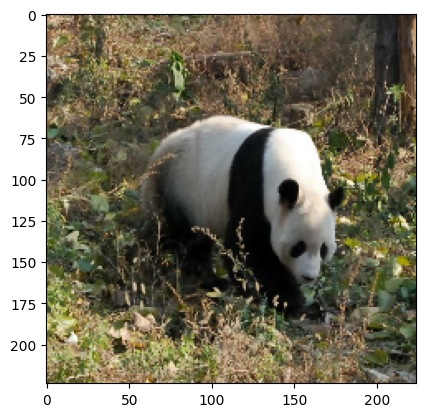

In [35]:
import matplotlib.pyplot as plt
a_img = np.zeros((1,224,224,3))
img_a = tf.io.read_file("Giant_Panda_in_Beijing_Zoo_1.jpg")
img_a = tf.image.decode_jpeg(img_a)
img_a = tf.image.convert_image_dtype(img_a,tf.float32)
img_a = tf.image.resize(img_a, (224,224))
a_img[0] = img_a
plt.imshow(img_a)

In [36]:
img_a

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5570234 , 0.48350874, 0.363806  ],
        [0.505511  , 0.47539896, 0.33093113],
        [0.8893135 , 0.87531304, 0.775854  ],
        ...,
        [0.23654157, 0.17643377, 0.13826837],
        [0.27660215, 0.20549744, 0.15688926],
        [0.33893642, 0.27175328, 0.19307339]],

       [[0.56384605, 0.4766832 , 0.37047696],
        [0.37270766, 0.31191367, 0.15864766],
        [0.54154307, 0.4902789 , 0.3564868 ],
        ...,
        [0.2279317 , 0.19036874, 0.16405217],
        [0.2790213 , 0.22459283, 0.19214848],
        [0.36162627, 0.27955797, 0.22520283]],

       [[0.49124077, 0.3527604 , 0.20399994],
        [0.7089256 , 0.57807827, 0.38749862],
        [0.62744427, 0.4969997 , 0.34426817],
        ...,
        [0.21918721, 0.1806631 , 0.1443884 ],
        [0.28503343, 0.20057075, 0.15426107],
        [0.46748248, 0.3230561 , 0.25918165]],

       ...,

       [[0.7788758 , 0.731817  , 0.56978995],
        [0.42

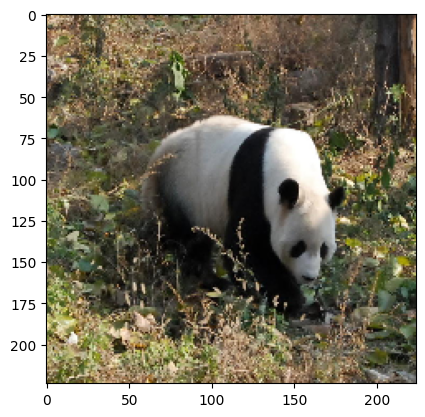

In [37]:
k_img = np.zeros((1,224,224,3))
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
img_k = tf.keras.preprocessing.image.load_img("Giant_Panda_in_Beijing_Zoo_1.jpg", target_size=(224,224))
img_k = tf.keras.preprocessing.image.img_to_array(img_k)
img_k = preprocess_input(img_k)
k_img[0] = img_k
#plt.imshow((img +1)/2 )  FOR mobilenet_v2
plt.imshow((img_k +1)/255)

In [38]:
(img_k +1)/255

array([[[0.5568628 , 0.48235294, 0.3647059 ],
        [0.53333336, 0.49411765, 0.35686275],
        [0.85490197, 0.83137256, 0.7294118 ],
        ...,
        [0.25490198, 0.18039216, 0.15294118],
        [0.2901961 , 0.21176471, 0.16862746],
        [0.3529412 , 0.28235295, 0.20392157]],

       [[0.63529414, 0.5411765 , 0.4392157 ],
        [0.31764707, 0.24705882, 0.09803922],
        [0.42745098, 0.3647059 , 0.23137255],
        ...,
        [0.22352941, 0.1882353 , 0.16862746],
        [0.3019608 , 0.23529412, 0.20784314],
        [0.3764706 , 0.28235295, 0.23529412]],

       [[0.5254902 , 0.39215687, 0.25490198],
        [0.69411767, 0.5686275 , 0.38431373],
        [0.6509804 , 0.5176471 , 0.36862746],
        ...,
        [0.21960784, 0.16862746, 0.13725491],
        [0.29803923, 0.21176471, 0.16862746],
        [0.46666667, 0.32156864, 0.25882354]],

       ...,

       [[0.8039216 , 0.75686276, 0.5921569 ],
        [0.40392157, 0.35686275, 0.19215687],
        [0.50980395, 0

In [40]:
output_app_model_i = tf_app_model.predict_on_batch(k_img)

In [51]:
output_app_model_i[0,:10]

array([8.5319909e-05, 1.3777521e-04, 7.0905044e-05, 9.9768768e-05,
       4.3555166e-05, 5.8287755e-05, 7.3283947e-05, 3.2312673e-05,
       6.3670683e-05, 1.5338284e-05], dtype=float32)

In [52]:
output_hub_model_i = tf_hub_model.predict_on_batch(a_img)

In [53]:
output_hub_model_i[0,:10]

array([1.06173902e-04, 1.55965390e-04, 8.46877301e-05, 1.11792382e-04,
       1.70759653e-04, 1.32115267e-04, 1.23119127e-04, 5.14817875e-05,
       1.12696696e-04, 1.98934395e-05], dtype=float32)

In [42]:
np.allclose(output_app_model_i, output_hub_model_i, rtol=0.8)

False

In [54]:
output_app_model_i1 = tf_app_model.predict_on_batch(a_img)

In [55]:
output_hub_model_i1 = tf_hub_model.predict_on_batch(k_img)

In [56]:
output_app_model_i1[0,:10]

array([0.00065344, 0.00121315, 0.00145424, 0.00200878, 0.00258756,
       0.00087722, 0.00068771, 0.00069481, 0.00043018, 0.00059948],
      dtype=float32)

In [57]:
output_hub_model_i1[0,:10]

array([8.7430531e-30, 9.2485473e-35, 1.0003180e-29, 4.6421882e-26,
       3.9723524e-35, 0.0000000e+00, 1.1054535e-36, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)